In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


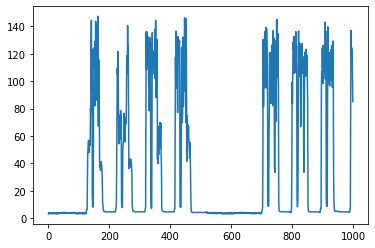

In [2]:
plt.plot(df['Usage_kWh'][:1000])

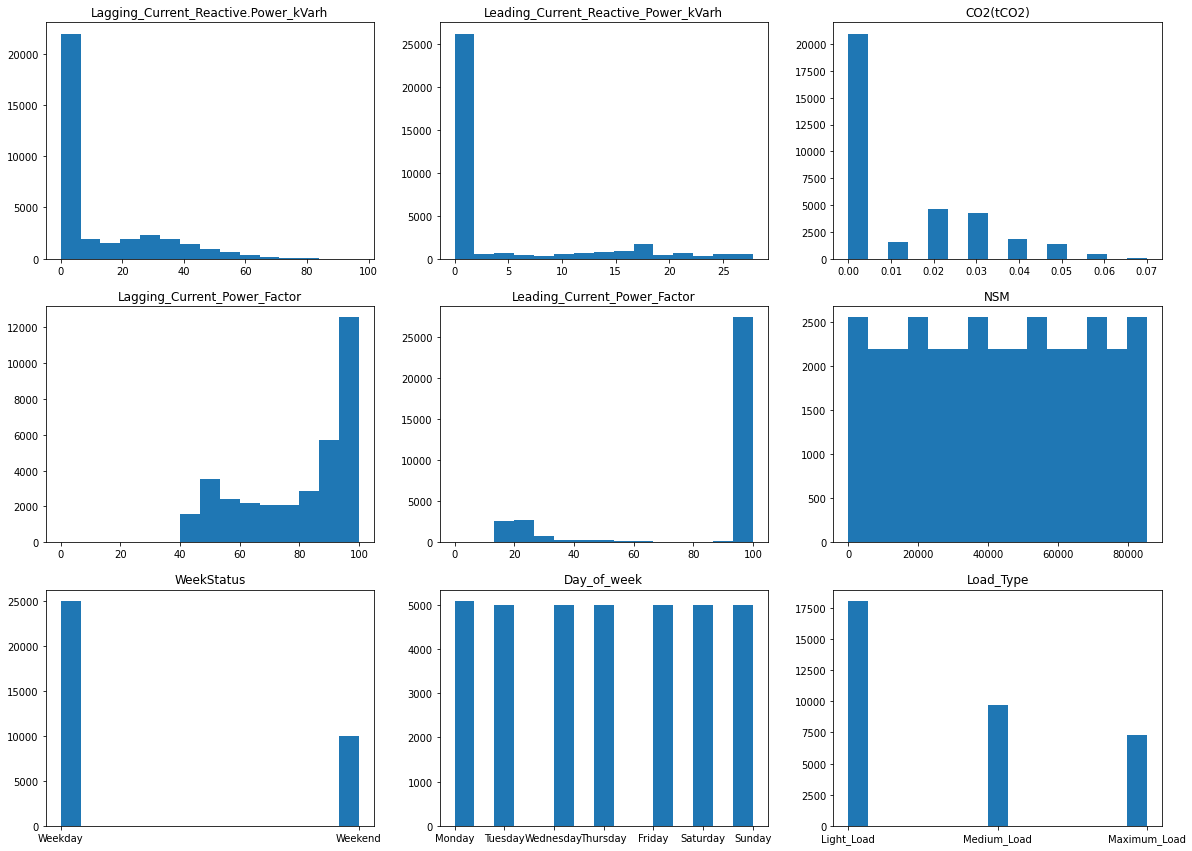

In [3]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(df.drop(['date', 'Usage_kWh'], axis=1).columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col], 15)
    plt.title(col)

In [4]:
from preproccesing import apply_enconding, get_feature_cols, train_val_test_seq, apply_sliding_window

df = get_feature_cols(apply_enconding(df))

train, val, test = train_val_test_seq(df)
print(train.shape, val.shape, test.shape)

(22425, 12) (5607, 12) (7008, 12)


In [5]:
seq_len = 20
target_size = 1
    
X_train, y_train = apply_sliding_window(train, seq_len, target_size, 'Usage_kWh')
X_val, y_val = apply_sliding_window(val, seq_len, target_size, 'Usage_kWh')
X_test, y_test = apply_sliding_window(test, seq_len, target_size, 'Usage_kWh')

print(X_train.shape, X_val.shape, X_test.shape)

(22405, 20, 12) (5587, 20, 12) (6988, 20, 12)


## RNN

In [6]:
from optimizers import Adam, setup_optimizers
from train import train_model
from model import RNN
from layers import MSELoss

model = RNN(features_num=12, hidden_rnn_size=100)

model.optim = Adam()
loss = MSELoss
setup_optimizers(model)

best_model = train_model(model, loss, X_train, y_train, X_val, y_val, len(X_train))

Epoch 0:  Train loss: 1973.00759  Val loss: 1454.39669
Epoch 50:  Train loss: 609.48995  Val loss: 481.99843
Epoch 100:  Train loss: 446.47534  Val loss: 340.90134
Epoch 150:  Train loss: 356.38405  Val loss: 267.38873
Epoch 200:  Train loss: 304.84089  Val loss: 225.27694
Epoch 250:  Train loss: 272.30543  Val loss: 198.77450
Epoch 300:  Train loss: 250.33975  Val loss: 180.94459
Epoch 350:  Train loss: 235.06785  Val loss: 168.56568
Epoch 400:  Train loss: 224.41642  Val loss: 159.91073
Epoch 450:  Train loss: 217.08834  Val loss: 153.90834
Epoch 500:  Train loss: 212.16823  Val loss: 149.81560
Epoch 550:  Train loss: 208.96612  Val loss: 147.08442
Epoch 600:  Train loss: 206.95267  Val loss: 145.30225
Epoch 650:  Train loss: 205.72851  Val loss: 144.16172
Epoch 700:  Train loss: 205.00376  Val loss: 143.44053
Epoch 750:  Train loss: 204.58007  Val loss: 142.98530
Epoch 800:  Train loss: 204.32910  Val loss: 142.69435
Epoch 850:  Train loss: 204.17131  Val loss: 142.50184
Epoch 900: 

In [7]:
import numpy as np

test = np.array(X_test)
pred = best_model.forward(test)

np.mean((pred - y_test)**2)

179.29733811639574

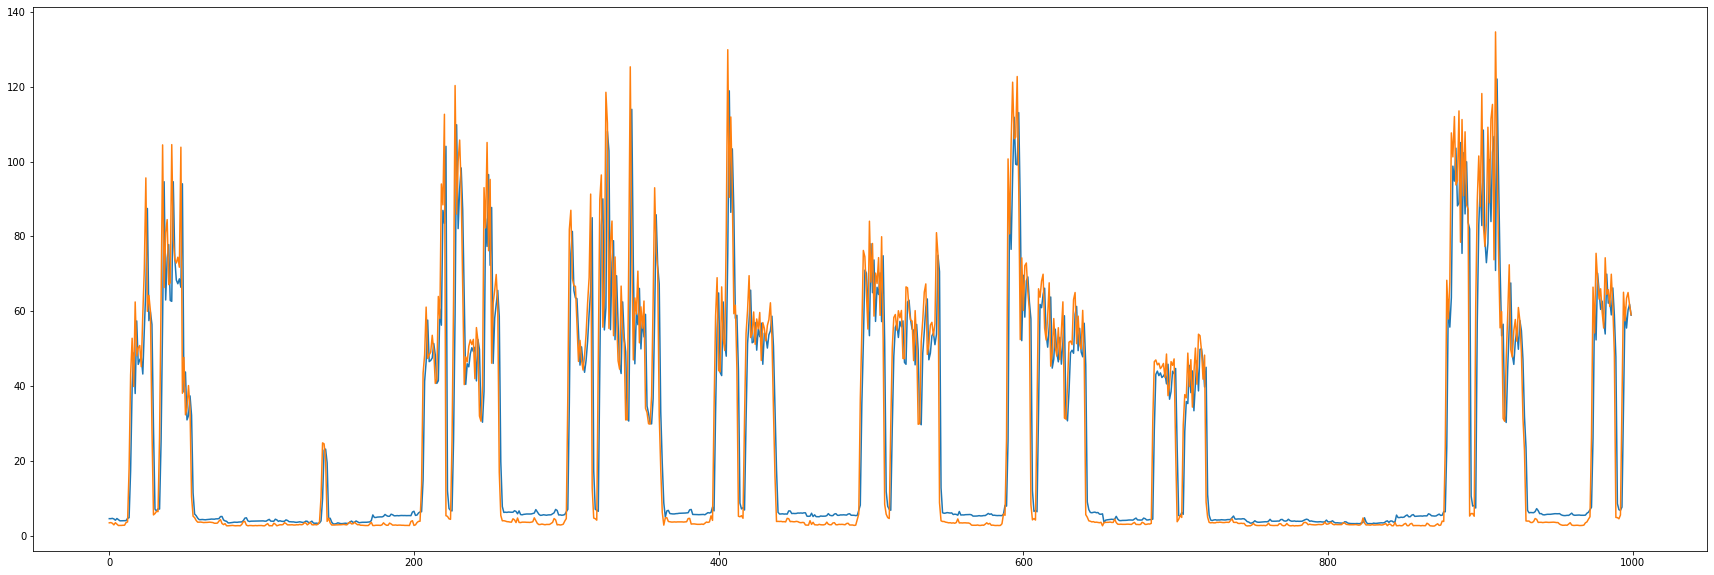

In [8]:
plt.figure(figsize=(30, 10))

plt.plot(pred[:1000])
plt.plot(y_test[:1000])

## LSTM

In [7]:
from optimizers import Adam, setup_optimizers
from train import train_model
from model import LSTM
from layers import MSELoss

model = LSTM(features_num=12, hidden_rnn_size=100)

model.optim = Adam()
loss = MSELoss
setup_optimizers(model)

best_model = train_model(model, loss, X_train, y_train, X_val, y_val, len(X_train), epoch_num=10000)


Epoch 0:  Train loss: 1972.89821  Val loss: 1451.82619
Epoch 25:  Train loss: 1797.32929  Val loss: 1310.13094
Epoch 50:  Train loss: 1580.76088  Val loss: 1146.81245
Epoch 75:  Train loss: 1383.67979  Val loss: 991.51396
Epoch 100:  Train loss: 1205.39826  Val loss: 854.68020
Epoch 125:  Train loss: 1054.01844  Val loss: 740.27136
Epoch 150:  Train loss: 925.90396  Val loss: 644.59079
Epoch 175:  Train loss: 817.21621  Val loss: 563.78385
Epoch 200:  Train loss: 725.01043  Val loss: 496.20313
Epoch 225:  Train loss: 646.62025  Val loss: 439.56346
Epoch 250:  Train loss: 580.30858  Val loss: 392.17398
Epoch 275:  Train loss: 523.75642  Val loss: 352.67396
Epoch 300:  Train loss: 475.86878  Val loss: 320.60410
Epoch 325:  Train loss: 435.02818  Val loss: 293.79863
Epoch 350:  Train loss: 400.57102  Val loss: 271.72395
Epoch 375:  Train loss: 374.45770  Val loss: 254.80463
Epoch 400:  Train loss: 389.09040  Val loss: 272.41508
Epoch 425:  Train loss: 409.98596  Val loss: 290.58718
Epoch

In [10]:
test = np.array(X_test)
pred = best_model.forward(test)

np.mean((pred - y_test)**2)

140.4630285481


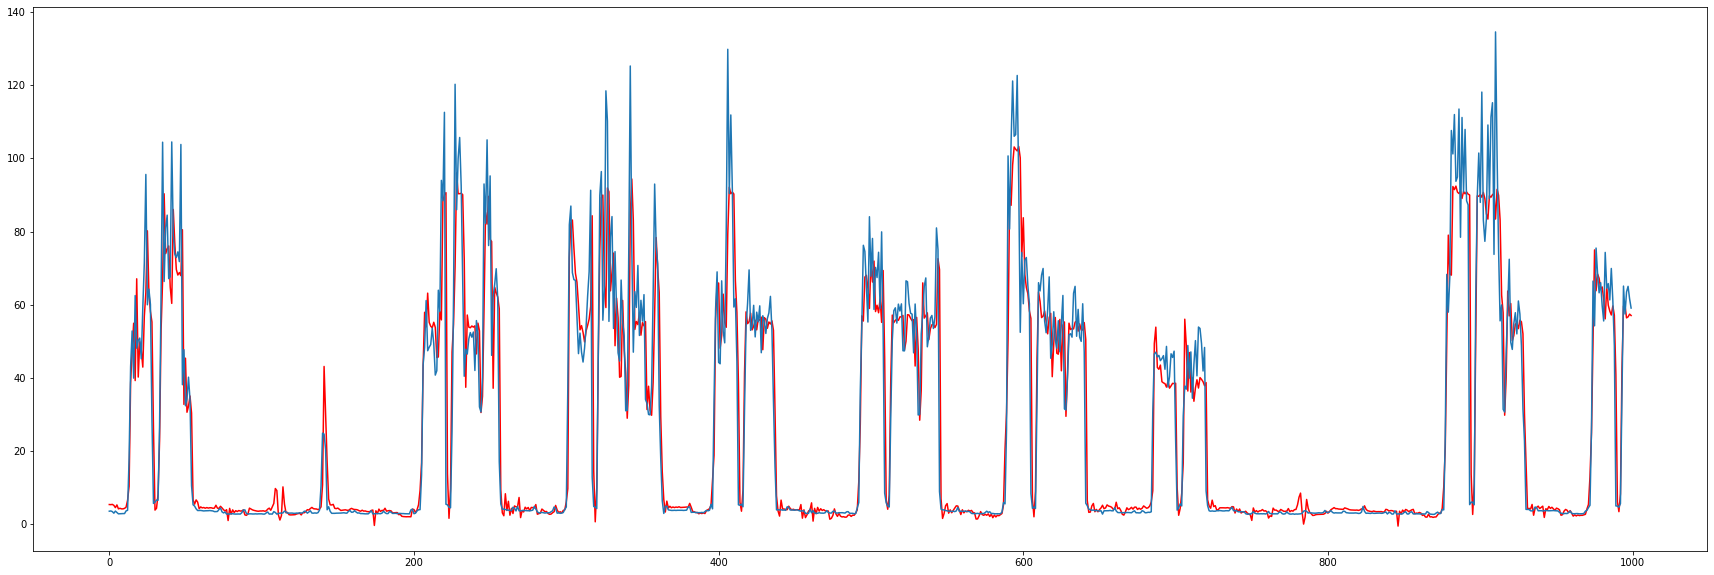

In [ ]:
plt.figure(figsize=(30, 10))

plt.plot(pred[:1000], 'r')
plt.plot(y_test[:1000])